In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
from sklearn.svm import SVC

In [11]:
path = os.listdir('Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1, 'glioma_tumor':2, 'meningioma_tumor':3 }

In [12]:
X = []
Y = []
for cls in classes:
    pth = 'Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0) 
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [13]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=25,
                                               test_size=.20)
xtrain = xtrain/255
xtest = xtest/255

In [15]:
sv = SVC(probability=True)
sv.fit(xtrain, ytrain)
print("Training Score:", round(sv.score(xtrain, ytrain)*100,2) , " %")
print("Testing Score:", round(sv.score(xtest, ytest)*100,2) , " %")

Training Score: 93.9  %
Testing Score: 84.49  %


In [16]:
key = {0:'No Tumor', 1:'Pituriaty_tumor', 2:'Glioma_tumor', 3:'Meningioma_tumor'}

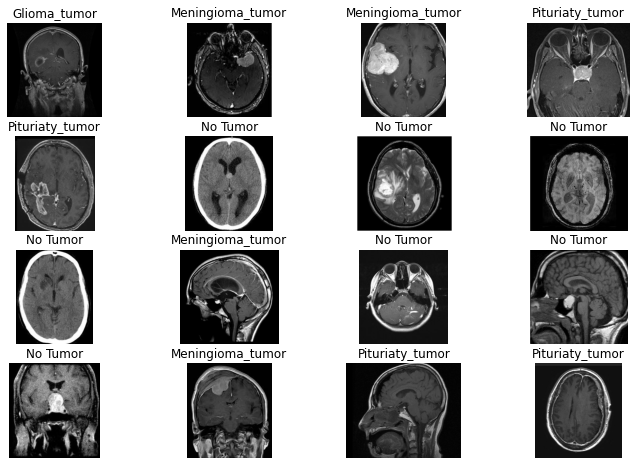

In [58]:
import random
plt.figure(figsize=(12,8))
p = os.listdir('all/')
c=1
image_to_show = []
for i in os.listdir('all/')[:377]:
    image_to_show.append(i)


for i in range(16):
    plt.subplot(4,4,c)
    
    img = cv2.imread('all/'+image_to_show[random.randint(0,377)],0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(key[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
import joblib

filename = 'trained_model.sav'
joblib.dump(sv, filename)